### 2 - Rede Perceptron:

Epoch 1/50
23/23 [==============================] - 2s 44ms/step - loss: 59.0512 - accuracy: 0.3806 - val_loss: 23.2234 - val_accuracy: 0.4134
Epoch 2/50
23/23 [==============================] - 0s 9ms/step - loss: 22.2980 - accuracy: 0.4579 - val_loss: 5.5696 - val_accuracy: 0.5866
Epoch 3/50
23/23 [==============================] - 0s 14ms/step - loss: 14.7397 - accuracy: 0.5365 - val_loss: 8.1217 - val_accuracy: 0.5866
Epoch 4/50
23/23 [==============================] - 0s 13ms/step - loss: 13.1482 - accuracy: 0.4888 - val_loss: 6.6586 - val_accuracy: 0.5866
Epoch 5/50
23/23 [==============================] - 0s 12ms/step - loss: 11.3074 - accuracy: 0.5506 - val_loss: 5.9364 - val_accuracy: 0.5866
Epoch 6/50
23/23 [==============================] - 0s 14ms/step - loss: 10.6992 - accuracy: 0.5084 - val_loss: 4.4528 - val_accuracy: 0.5866
Epoch 7/50
23/23 [==============================] - 0s 11ms/step - loss: 8.3648 - accuracy: 0.5281 - val_loss: 3.7612 - val_accuracy: 0.5810
Epoch 8

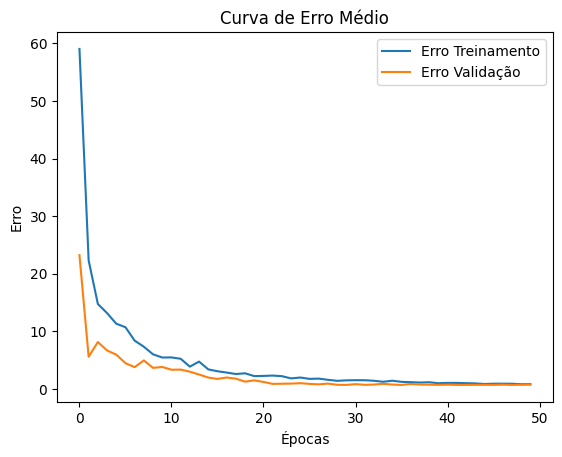

In [3]:
import os
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Verificar se o arquivo de dados existe
if not os.path.exists('../data/preprocessed_titanic.csv'):
    raise FileNotFoundError("O arquivo 'preprocessed_titanic.csv' não foi encontrado!")

# Carregar os dados
data = pd.read_csv('../data/preprocessed_titanic.csv')
X = data.drop(['Survived'], axis=1)
y = data['Survived']

# Divisão dos dados
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Garantir que a pasta ../results/ existe
os.makedirs('../results/', exist_ok=True)

# Salvar gráfico de treinamento
plt.plot(history.history['loss'], label='Erro Treinamento')
plt.plot(history.history['val_loss'], label='Erro Validação')
plt.title('Curva de Erro Médio')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend(loc='upper right')
plt.savefig('../results/training_curve.png')
plt.show()

# Salvar o modelo treinado
model.save('../results/model_titanic.h5')
